# Getting started with Task 1

Instructions:
- Download the dataset from the [ECG Heartbeat Categorization Dataset](https://www.kaggle.com/datasets/shayanfazeli/heartbeat)
- Unzip the `archive.zip` file
- Rename the folder `archive` as `ecg_dataset` and place it in the root of the git repository

References:
- [ECG Heartbeat Classification: A Deep Transferable Representation](https://arxiv.org/pdf/1805.00794.pdf)

## Load dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# ### The PTB Diagnostic ECG Database

- Number of Samples: 14552
- Number of Categories: 2
- Sampling Frequency: 125Hz
- Data Source: Physionet's PTB Diagnostic Database
- ECG lead II re-sampled to the sampling frequency of 125Hz as the input (from [ECG Heartbeat Classification: A Deep Transferable Representation](https://arxiv.org/pdf/1805.00794.pdf))
- Remark: All the samples are cropped, downsampled and padded with zeroes if necessary to the fixed dimension of 188.
- The final element of each row denotes the class to which that example belongs.


The shape of the normal dataframe is :  (4046, 188)
Class :  0.0
The shape of the abnormal dataframe is :  (10506, 188)
Class :  1.0
The last time value is :  1488.0


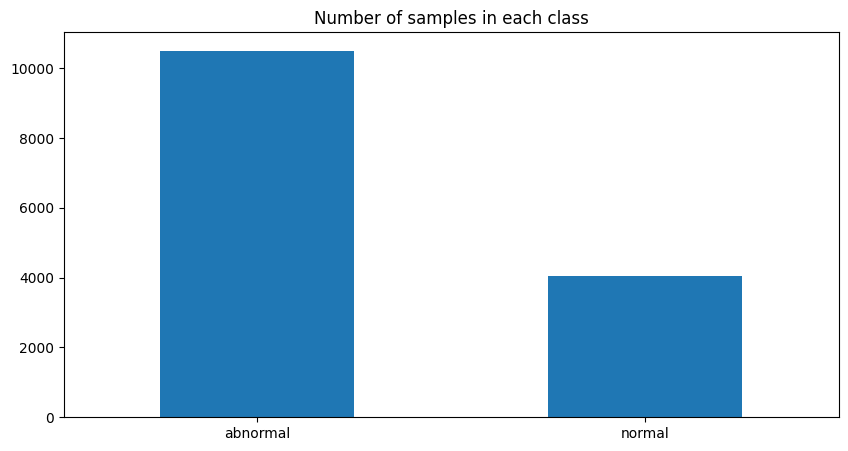

In [ ]:
df_ptbd_normal = pd.read_csv("/content/ptbdb_normal.csv", header = None)
df_ptbd_abnormal = pd.read_csv("/content/ptbdb_abnormal.csv", header = None)

# print shapes of the dataframes
print("The shape of the normal dataframe is : ", df_ptbd_normal.shape)
# print one example of the last column
print("Class : ", df_ptbd_normal.iloc[:, -1][0])
print("The shape of the abnormal dataframe is : ", df_ptbd_abnormal.shape)
# print one example of the last column
print("Class : ", df_ptbd_abnormal.iloc[:, -1][0])

# classes are 0 (normal) and 1 (abnormal)
classes_names = {0 : "normal",
                 1 : "abnormal"}

# Used in confusion
class_names_label = np.array( ["Normal", "Abnormal"])

# get the number of columns in the dataframe
# the last column is the label/class
num_cols = df_ptbd_normal.shape[1] - 1
# the signal was resampled at frequency of 125Hz as the input
# compute the time vector
time = np.arange(0, num_cols) / 125
# convert to milliseconds
time = time * 1000
# print last time value
print("The last time value is : ", time[-1])

# for the first "num_cols" and the time steps as column names
df_ptbd_normal.columns = list(time) + ["label"]
df_ptbd_abnormal.columns = list(time) + ["label"]

# concatenate the two dataframes
df_ptbd = pd.concat([df_ptbd_normal, df_ptbd_abnormal], axis = 0)

# count the number of samples in each class and plot a bar chart
# change the class names to "normal" and "abnormal"
# count the number of samples in each class
counts = df_ptbd["label"].value_counts()
# substitute the class names: 0.0 -> normal, 1.0 -> abnormal
counts.index = counts.index.map(classes_names)
# create a figure
plt.figure(figsize = (10, 5))
# plot a bar chart
counts.plot(kind = "bar")
# plot xticks in angle
plt.xticks(rotation = 0)
plt.title("Number of samples in each class")
plt.show()

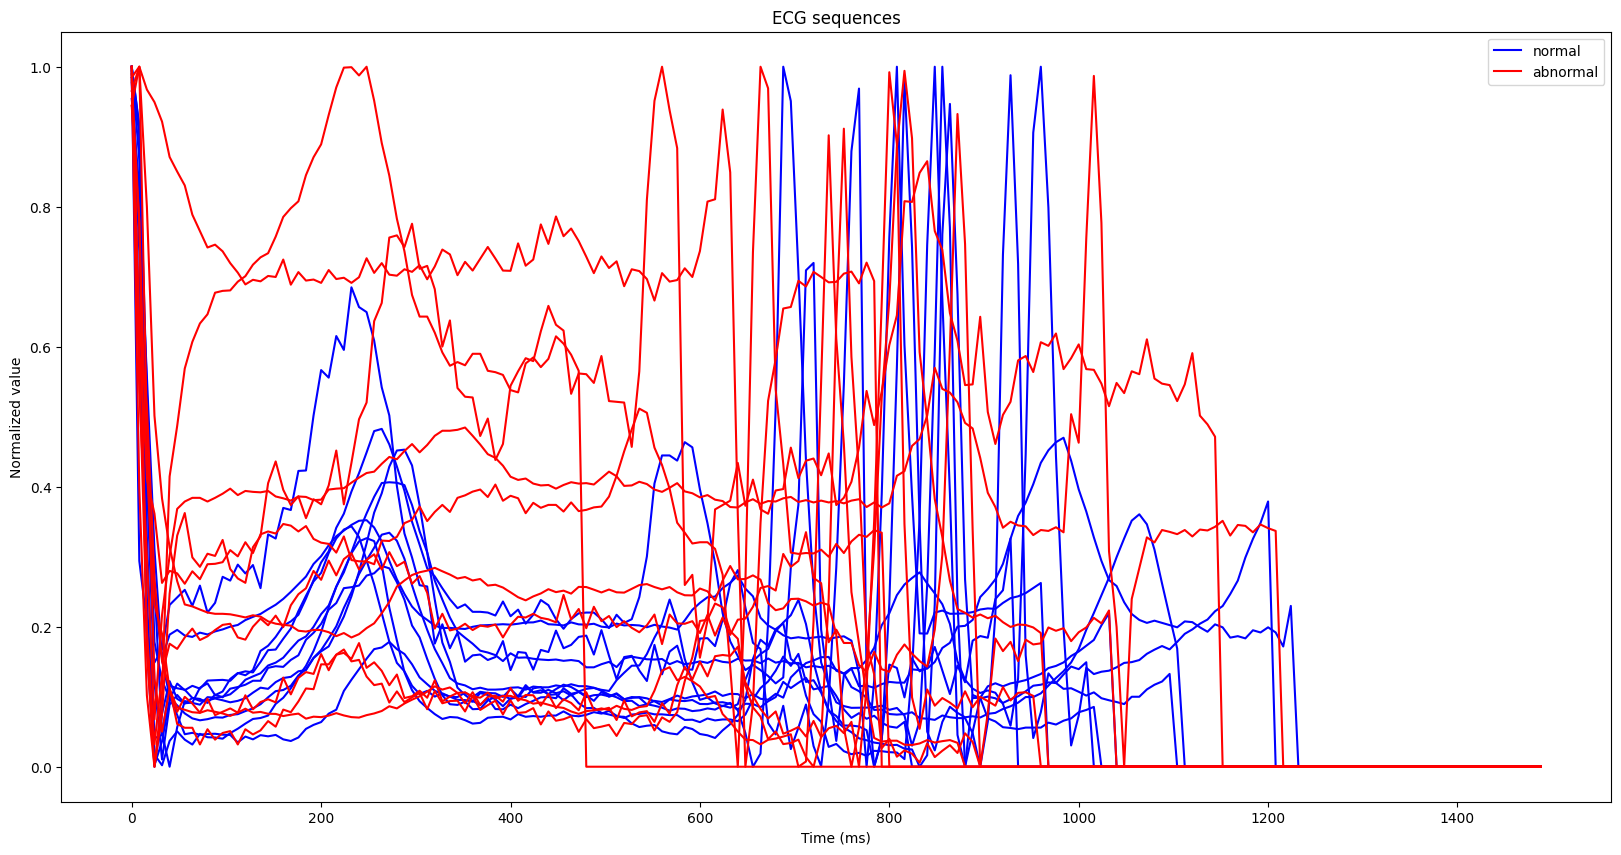

In [ ]:
# plot a a row of the dataframe
# select 10 random sequences with class 0 (normal) and 10 with class 1 (abnormal)
df_ptbd_normal = df_ptbd[df_ptbd["label"] == 0].sample(10)
df_ptbd_abnormal = df_ptbd[df_ptbd["label"] == 1].sample(10)

# create a figure
plt.figure(figsize = (20, 10))
# plot againts the column names (time)
# plot the normal sequences
for i in range(df_ptbd_normal.shape[0]):
    if i == 0:
        plt.plot(df_ptbd_normal.columns[:-1], df_ptbd_normal.iloc[i, :-1], color = "blue", label = "normal")
    else:
        plt.plot(df_ptbd_normal.columns[:-1], df_ptbd_normal.iloc[i, :-1],color = "blue")
# plot the abnormal sequences
for i in range(df_ptbd_abnormal.shape[0]):
    if i == 0:
        plt.plot(df_ptbd_abnormal.columns[:-1], df_ptbd_abnormal.iloc[i, :-1], color = "red", label = "abnormal")
    else:
        plt.plot(df_ptbd_abnormal.columns[:-1], df_ptbd_abnormal.iloc[i, :-1], color = "red")
# create a legend for the plot, blue for normal and red for abnormal
plt.legend()
# set the title
plt.title("ECG sequences")
# y lable is "Normalized value"
plt.ylabel("Normalized value")
# x label is "Time (ms)"
plt.xlabel("Time (ms)")
# show the plot
plt.show()
# close
plt.close()

In [ ]:
df_ptbd_normal = pd.read_csv("/content/ptbdb_normal.csv", header = None)
df_ptbd_abnormal = pd.read_csv("/content/ptbdb_abnormal.csv", header = None)

In [ ]:
normal_size = len(df_ptbd_normal.index)

abnormal_size = len(df_ptbd_abnormal.index)

print(normal_size)
print(abnormal_size)

# todo: normalize the data

4046
10506


# Concatenate both datasets

In [ ]:
all_sets = [df_ptbd_normal,df_ptbd_abnormal]
X_all = pd.concat(all_sets)

## to do //
# 1) combine both datasets and split it into training and testing
# 1a) split half of the data for normal and abnormal and combine them togetehr into one
# 1b) take each half and split them into training and testing

X_all.reset_index(drop=True, inplace=True)
X_all = pd.concat(all_sets)
 # to do/ shuffle data
X_all


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10504,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Shuffle and split data into training and testing data sets (ShuffleSplit)

In [ ]:
# Shuffle and split data into training and testing data sets (ShuffleSplit)
from sklearn.model_selection import ShuffleSplit

# You can change the ratio of test and train data set split
shuffle = ShuffleSplit(n_splits=5, test_size=0.5, train_size=0.5, random_state=42)

shuffle.get_n_splits(X_all)


#random state = 42

for i, (train_index, test_index) in enumerate(shuffle.split(X_all)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")


Fold 0:
  Train: index=[10912  2682  8431 ...  5390   860  7270]
  Test:  index=[ 2069  6174 11676 ...  4163  7300  8066]
Fold 1:
  Train: index=[ 7880  8332  4664 ... 12638  9522 13608]
  Test:  index=[ 3067 11986   214 ...  2238  4201  3847]
Fold 2:
  Train: index=[ 9107 14225  1754 ...  1391  8915  9045]
  Test:  index=[12582   863  7719 ... 13873 13748  3605]
Fold 3:
  Train: index=[4044 6912 9405 ... 6267 4103 7905]
  Test:  index=[  462  9884 14187 ...  3861  5639  2479]
Fold 4:
  Train: index=[ 1204  3018  3346 ...  3139  5509 13820]
  Test:  index=[ 4737  4921 10612 ... 11346  7623 14241]


In [ ]:
test_index.size

5147

In [ ]:
train_index.size

5146

In [ ]:
X_all.size

1935084

In [ ]:
# Values of training dataset:

X_all = pd.DataFrame(X_all)


training = X_all.iloc[train_index]
testing = X_all.iloc[test_index]

In [ ]:
testing

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
3115,0.950056,0.988777,0.913580,0.534792,0.177329,0.069585,0.060606,0.049383,0.043210,0.039843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
438,0.991695,0.668687,0.420202,0.211448,0.164085,0.197531,0.210325,0.203591,0.201347,0.202245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2450,1.000000,0.578032,0.244698,0.002719,0.103861,0.169114,0.166939,0.188146,0.179445,0.183252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5074,0.986341,0.607836,0.329978,0.255212,0.175054,0.121136,0.100647,0.101366,0.075126,0.088426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4802,0.869189,0.247568,0.000000,0.132973,0.322162,0.377297,0.416216,0.420541,0.433514,0.452973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6167,1.000000,0.810863,0.470417,0.194956,0.196411,0.170223,0.083899,0.075170,0.054801,0.077595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2188,1.000000,0.414902,0.000000,0.021580,0.077769,0.085505,0.092020,0.087541,0.067590,0.081840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2879,0.908676,0.955643,0.717873,0.457599,0.259295,0.148076,0.111546,0.078604,0.067841,0.063275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
719,1.000000,0.645234,0.341230,0.027637,0.115059,0.203610,0.203046,0.192329,0.202482,0.217710,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
training

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
2325,0.959359,0.632513,0.239267,0.092730,0.084144,0.061820,0.060103,0.046938,0.046938,0.045220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5437,0.945265,0.658558,0.273675,0.065161,0.029540,0.000000,0.046916,0.066898,0.034752,0.050391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3971,0.955382,0.842722,0.376464,0.230340,0.161182,0.161740,0.161182,0.140547,0.119911,0.105410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5960,0.914612,0.999399,0.881539,0.692724,0.380036,0.180998,0.084185,0.049308,0.033073,0.132892,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4924,0.978985,0.051449,0.043478,0.094928,0.224638,0.231884,0.228261,0.242754,0.233333,0.236957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5370,0.961311,0.637292,0.434175,0.351961,0.277808,0.301988,0.210102,0.131112,0.016120,0.015583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6183,0.951558,0.999476,0.277560,0.114690,0.000000,0.032993,0.087981,0.119141,0.190626,0.202671,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2199,1.000000,0.783936,0.281928,0.119277,0.129719,0.167068,0.186747,0.184337,0.173896,0.175502,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,1.000000,0.420063,0.248903,0.235110,0.161129,0.030094,0.033229,0.026332,0.023824,0.030721,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Values of training dataset:
X_train = training.iloc[:, 0:187]
# Label value of training dataset:
y_train = training.iloc[:, 187]

# Values of training dataset:
X_test = testing.iloc[:, 0:187]
# Label value of training dataset:
y_test = testing.iloc[:, 187]

# Normalize the Data using StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# K Nearest Neighbor Accuracy: 0.892
Normal Accuracy: 0.9502982107355865 <br>
Abnormal Accuracy: 0.8708206686930091

In [ ]:
from sklearn.neighbors import  KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)
# with standard scaler = 0.9730495158048602
# with robust scaler = 0.9725470491503746

Accuracy: 0.8927982407916437


In [ ]:
import sklearn
import seaborn as sns

In [ ]:
# Create confusion matrix
# y_pred = y_pred_knn
cm_KNN = sklearn.metrics.confusion_matrix(y_test, y_pred_knn)

cm_KNN

array([[1912,  100],
       [ 680, 4584]])

<Axes: >

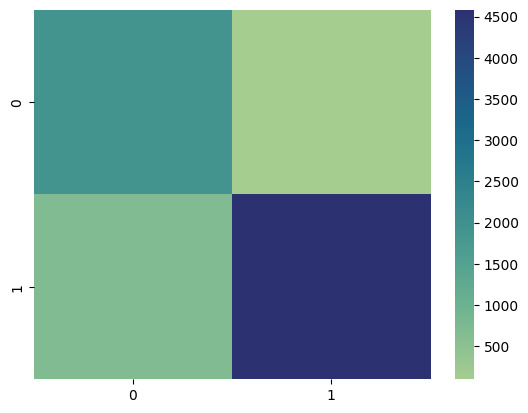

In [ ]:
sns.heatmap(cm_KNN, cmap="crest")

In [ ]:
# Accuracy does not work

c1 = cm_KNN[0,0]/y_test.value_counts()[0]
c2 = cm_KNN[1,1]/y_test.value_counts()[1]

print(f'Normal Accuracy: {c1}')
print(f'Abnormal Accuracy: {c2}')

Normal Accuracy: 0.9502982107355865
Abnormal Accuracy: 0.8708206686930091


# Multi-layer Perception Classifier Accuracy: 0.937328202308961
Normal Accuracy: 0.8996023856858847 <br>
Abnormal Accuracy: 0.9517477203647416



In [ ]:
from sklearn.neural_network import MLPClassifier


ANN = MLPClassifier(activation = 'relu', solver='sgd', alpha=.01,
                    hidden_layer_sizes=(35,), learning_rate='constant',
                    learning_rate_init=.001, max_iter = 10_000,
                    random_state = 42)

# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [ ]:
# artifical neural network
ANN.fit(X_train, y_train) #TwoSuccessiveExamsAsFeatures, PassAsResponse)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(35,), max_iter=10000,
              random_state=42, solver='sgd')

In [ ]:
y_pred_MLP = ANN.predict(X_test)

In [ ]:
ANN.score(X_test, y_test)

0.937328202308961

In [ ]:
accuracy = accuracy_score(y_test, y_pred_MLP)
print("Accuracy:", accuracy)

Accuracy: 0.937328202308961


In [ ]:
cm_MLP = sklearn.metrics.confusion_matrix(y_test, y_pred_MLP)

cm_MLP

array([[1810,  202],
       [ 254, 5010]])

<Axes: >

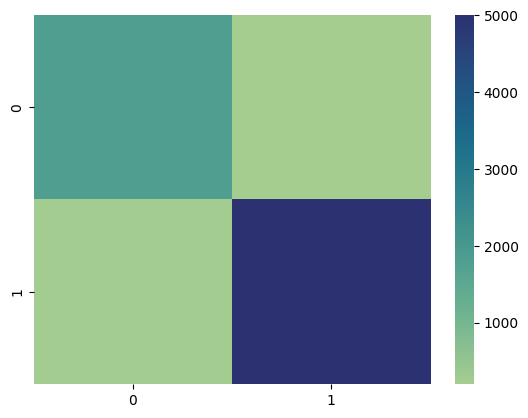

In [ ]:
sns.heatmap(cm_MLP, cmap="crest")

In [ ]:
# Accuracy does not work

c1 = cm_MLP[0,0]/y_test.value_counts()[0]
c2 = cm_MLP[1,1]/y_test.value_counts()[1]

print(f'Normal Accuracy: {c1}')
print(f'Abnormal Accuracy: {c2}')

Normal Accuracy: 0.8996023856858847
Abnormal Accuracy: 0.9517477203647416


# Kmeans Clustering Accuracy: 0.521

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_train)
y_pred_kmeans = kmeans.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
accuracy = accuracy_score(y_test, y_pred_kmeans)
accuracy

0.5218526663001649

# Random Forest Classifier Accuracy: 0.9606926882902693
Normal Accuracy: 0.9254473161033797 <br>
Abnormal Accuracy: 0.9741641337386018

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics

In [ ]:
randomForest = RandomForestClassifier(n_estimators = 47, criterion="entropy",
                                  min_samples_split=2, min_samples_leaf=1,
                                      min_weight_fraction_leaf=0.0,
                                     max_features="log2")

#max depth == 64, main sample, max depth

randomForest = randomForest.fit(X_train, y_train)

y_pred_randForest = randomForest.predict(X_test)
randomForest.score(X_test, y_test)
# n_estimators: 0.959180 // 50

0.9597306212204508

In [ ]:
y_pred_randForest = randomForest.predict(X_test)
randomForest.score(X_test, y_test)

0.9597306212204508

In [ ]:
y_pred_randForest

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
random_accuracy = accuracy_score(y_test, y_pred_randForest)
print("Accuracy:", random_accuracy)

Accuracy: 0.9597306212204508


Accuracy =  0.9597306212204508
Confusion matrix, without normalization
Normalized confusion matrix


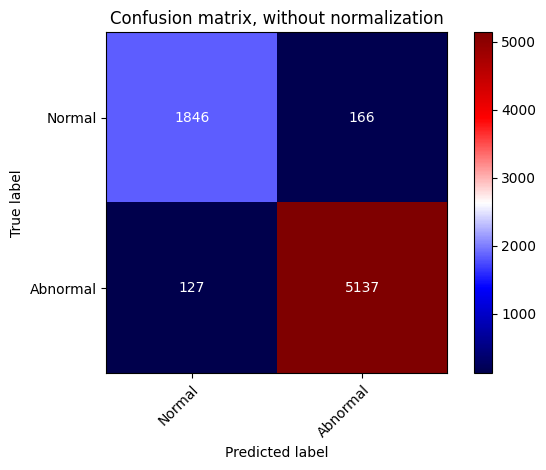

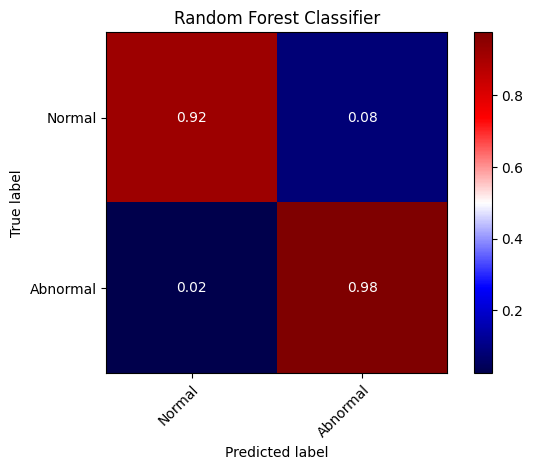

In [ ]:
acc = metrics.accuracy_score(randomForest.predict(X_test), testing.iloc[:, 187])
print("Accuracy = ",acc )
y = np.repeat(np.arange(0,5),5)


#===================== Start of Function ==================================
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred).astype(int)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap="seismic") # <------ Change theme here (heart theme: seismic)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "white") #<---- Change color of numbers (heart theme: white)
    fig.tight_layout()
    #plt.xlim(-0.5, len(np.unique(y))-0.5)
    #plt.ylim(len(np.unique(y))-0.5, -0.5)
    return ax
#===================== End of Function ==================================


np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_randForest, classes=class_names,
                     title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_randForest, classes=class_names, normalize=True, title='Random Forest Classifier')
                                                                                        # ^ Normalized, meaning percentage value
#plt.savefig('/content/drive/MyDrive/', dpi=300)
plt.show()
